# Day 8: Support Vector Machines (SVMs) - Kernel Trick & When They Work

**Welcome to Week 2 and Day 8 of your ML journey!** Today we'll explore one of the most elegant and powerful algorithms in machine learning: **Support Vector Machines (SVMs)**. SVMs are particularly fascinating because they use geometry and optimization to find the best decision boundary, and with the kernel trick, they can handle incredibly complex, non-linear patterns.

---

**Goal:** Master SVMs with focus on the kernel trick and understanding when/why they work best.

**Topics Covered:**
- SVM intuition and geometric interpretation
- The kernel trick and non-linear transformations
- Different kernel types and when to use each
- SVM hyperparameters and tuning
- Real-world applications and limitations
- Comparison with other ML algorithms


---

## 1. Concept Overview

### What is a Support Vector Machine?

A **Support Vector Machine (SVM)** is a supervised learning algorithm that finds the optimal decision boundary (hyperplane) to separate different classes. The "optimal" boundary is the one that maximizes the margin between classes.

**The Core Intuition:**
Imagine you're drawing a line to separate two groups of points on paper. SVM doesn't just draw any line - it finds the line that creates the **widest possible gap** between the two groups. This wide gap (margin) makes the model more confident and robust.

<div align="center">
<img src="../SVM2.JPG" alt="SVM Decision Boundary" width="500" height="300">
</div>

**Key Terms:**
- **Support Vectors**: The data points closest to the decision boundary
- **Margin**: The distance between the decision boundary and the nearest data points
- **Hyperplane**: The decision boundary (line in 2D, plane in 3D, etc.)

### Why SVMs are Powerful

1. **Maximum Margin**: Creates the most robust decision boundary
2. **Kernel Trick**: Can handle non-linear patterns without explicitly transforming data
3. **Memory Efficient**: Only uses support vectors for predictions
4. **High Dimensional**: Works well even with many features
5. **Versatile**: Works for both classification and regression


### The Kernel Trick - The Magic of SVMs

**The Problem:** Sometimes data isn't linearly separable. For example, imagine trying to separate two groups that are arranged in concentric circles.

<div align="center">
<img src="../Non Separable linear points.JPG" alt="SVM Decision Boundary" width="400" height="400">
</div>

**Figure:** This illustrates the classic "concentric circles" problem where two classes (blue inner circle and orange outer ring) cannot be separated by any straight line. The dashed lines show how linear boundaries inevitably cut through both groups, demonstrating why we need non-linear methods like the kernel trick.

**The Solution:** The kernel trick allows SVMs to work in a higher-dimensional space where the data becomes linearly separable, without actually computing the transformation.

<div align="center">
<img src="../Solution to Non separable linear points.png" alt="SVM Decision Boundary" width="400" height="400">
</div>

**Figure:** The kernel trick transforms non-linearly separable data (left: 2D concentric circles) into a higher-dimensional space (right: 3D) where a simple plane can separate the classes. This is the "magic" of SVMs - solving complex problems by working in higher dimensions.

**Here Is Real-World Analogy:**
Think of it like this: You have two groups of people in a room, and you can't draw a straight line to separate them. But if you could somehow "lift" them into 3D space, you might be able to separate them with a plane. The kernel trick does this mathematically.

**Common Kernel Types:**

1. **Linear Kernel**: For linearly separable data
2. **Polynomial Kernel**: For polynomial relationships
3. **RBF (Radial Basis Function)**: For complex, non-linear patterns
4. **Sigmoid Kernel**: Similar to neural networks

### When to Use SVMs

**SVMs Work Best When:**
- You have high-dimensional data (many features)
- Data is not linearly separable
- You need a robust, generalizable model
- You have a moderate amount of data (not too small, not too huge)

**SVMs May Not Be Ideal When:**
- You have very large datasets (millions of samples)
- You need probabilistic outputs
- Data has a lot of noise
- You need fast training times


---

## 2. Code Demo

Let's explore SVMs with practical examples using different kernels and real datasets.


In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


### Demo 1: Linear SVM - Basic Classification

Let's start with a simple linear classification problem to understand the basic SVM concept.


In [2]:
# Create a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Make predictions
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Linear SVM Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Linear SVM Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



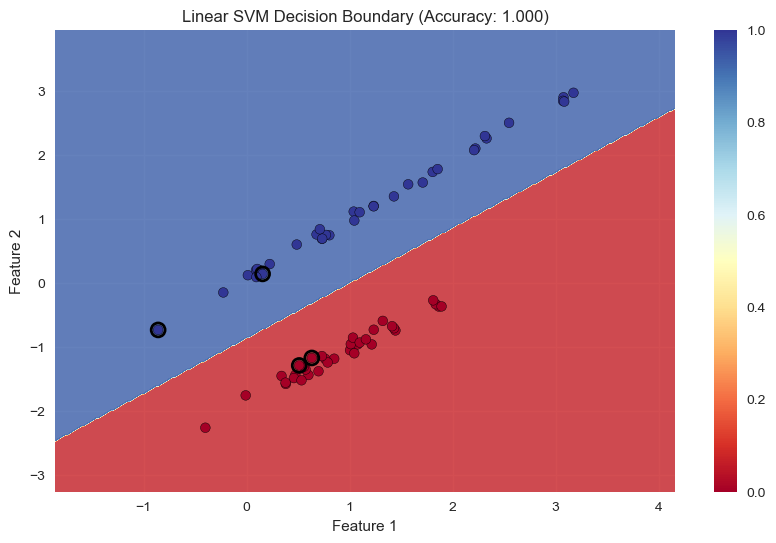

In [3]:
# Visualize the decision boundary
def plot_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 6))
    
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Highlight support vectors
    if hasattr(model, 'support_vectors_'):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, facecolors='none', edgecolors='black', linewidth=2)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Plot the linear SVM result
plot_decision_boundary(X_train, y_train, svm_linear, 
                       f'Linear SVM Decision Boundary (Accuracy: {accuracy:.3f})')


**Key Observations:**
- The **straight decision boundary** perfectly separates the two classes (red and blue points)
- **Support vectors** (black circles) define the maximum margin between classes
- **Perfect accuracy (1.000)** demonstrates SVM's effectiveness on linearly separable data
- The **wide margin** makes the model robust and generalizable to new data

**Why This Matters:** This visualization shows how Linear SVMs excel when data is naturally separable by a straight line, creating the most confident and stable decision boundary possible.

### Demo 2: The Kernel Trick in Action

Now let's see how different kernels handle non-linearly separable data.


In [4]:
# Create non-linearly separable data (concentric circles)
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=42)

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_circles, y_circles, 
                                                           test_size=0.3, random_state=42)

# Try different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}
accuracies = {}

for kernel in kernels:
    # Train SVM with different kernel
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_c, y_train_c)
    
    # Make predictions
    y_pred = svm.predict(X_test_c)
    accuracy = accuracy_score(y_test_c, y_pred)
    
    models[kernel] = svm
    accuracies[kernel] = accuracy
    
    print(f"{kernel.upper()} Kernel Accuracy: {accuracy:.3f}")

print(f"\nBest performing kernel: {max(accuracies, key=accuracies.get).upper()}")


LINEAR Kernel Accuracy: 0.600
POLY Kernel Accuracy: 0.583
RBF Kernel Accuracy: 1.000
SIGMOID Kernel Accuracy: 0.550

Best performing kernel: RBF


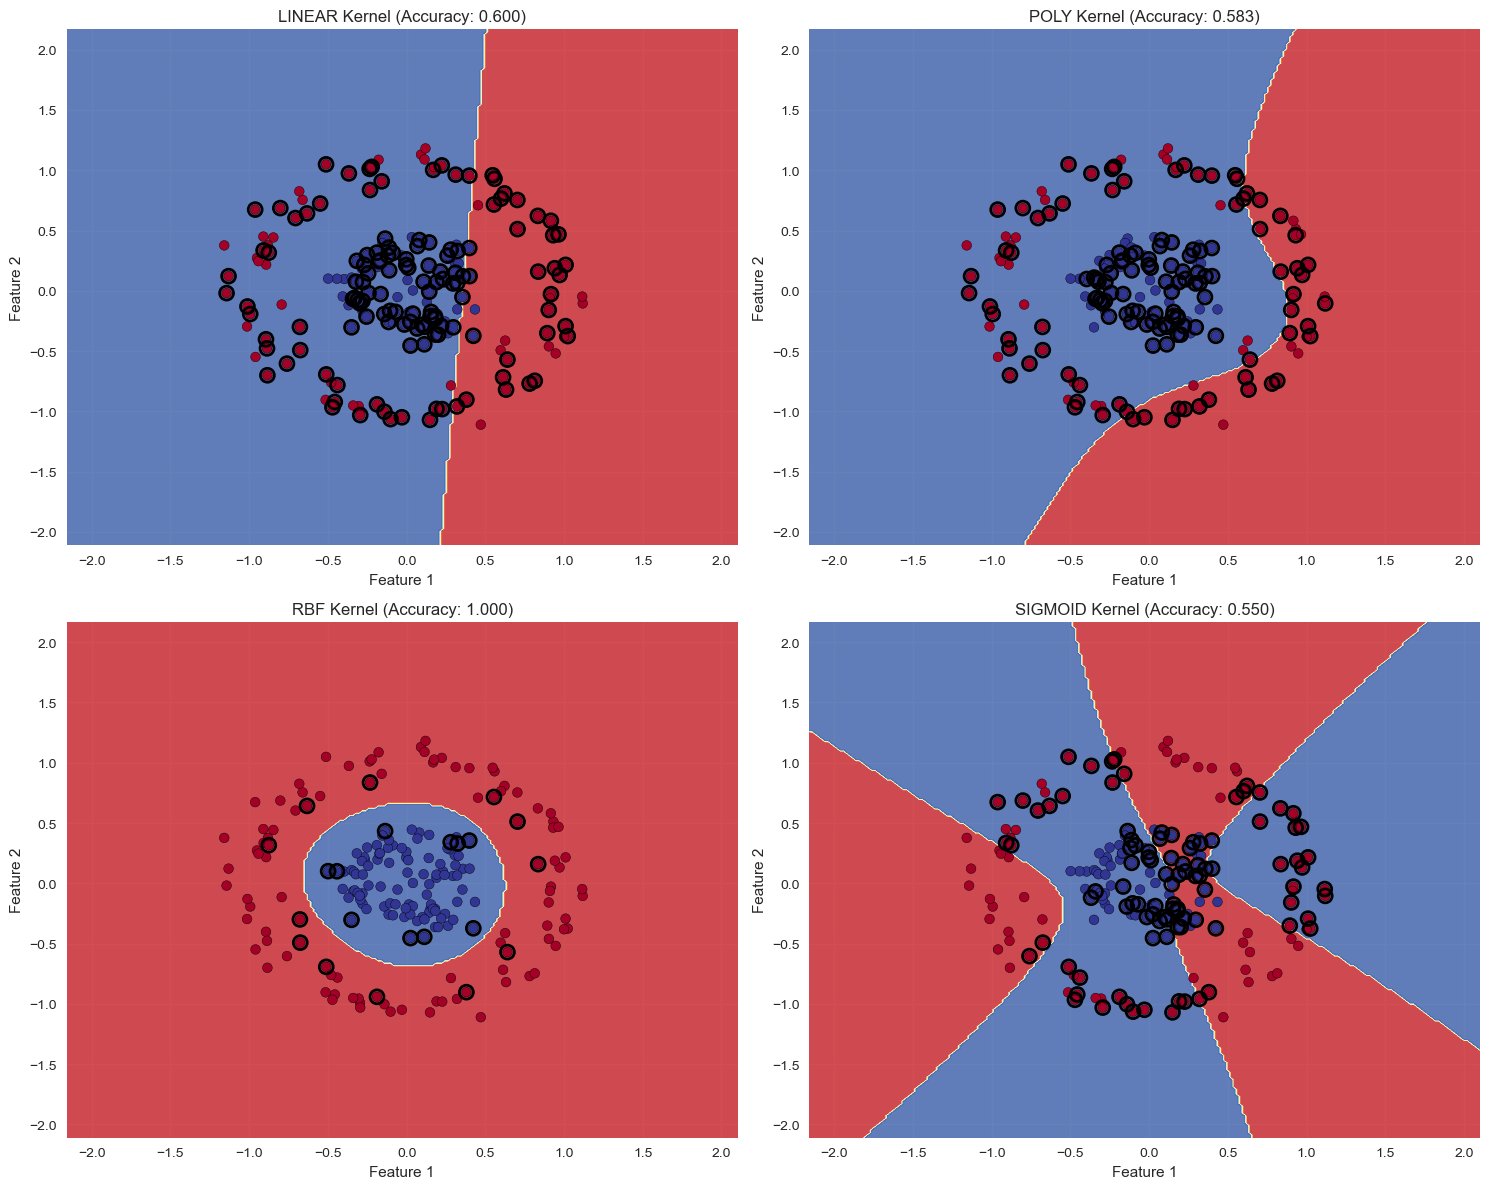

In [5]:
# Visualize all kernels
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    ax = axes[i]
    
    # Create mesh
    h = 0.02
    x_min, x_max = X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1
    y_min, y_max = X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Make predictions
    Z = models[kernel].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, 
              cmap=plt.cm.RdYlBu, edgecolors='black')
    
    # Highlight support vectors
    ax.scatter(models[kernel].support_vectors_[:, 0], 
              models[kernel].support_vectors_[:, 1],
              s=100, facecolors='none', edgecolors='black', linewidth=2)
    
    ax.set_title(f'{kernel.upper()} Kernel (Accuracy: {accuracies[kernel]:.3f})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


**Key Observations:**
- **Linear kernel** fails completely (0.600 accuracy) - straight lines can't separate concentric circles
- **Polynomial kernel** struggles (0.583 accuracy) - creates complex but ineffective boundaries
- **RBF kernel** excels (1.000 accuracy) - finds the perfect circular decision boundary
- **Sigmoid kernel** performs poorly (0.550 accuracy) - creates chaotic, non-generalizable patterns

**Why This Matters:** This comparison demonstrates the **kernel trick's power** - while linear methods fail on non-linear data, the RBF kernel implicitly transforms the data to a higher dimension where perfect separation becomes possible. Choosing the right kernel is crucial for SVM success on complex patterns.

### Demo 3: SVM Hyperparameter Tuning

SVMs have important hyperparameters that significantly affect performance. Let's tune them properly.


In [6]:
# Create a more complex dataset for tuning
X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, 
                                                            test_size=0.3, random_state=42)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_m)
X_test_scaled = scaler.transform(X_test_m)

# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# Grid search
svm_grid = GridSearchCV(SVC(kernel='rbf', random_state=42), 
                        param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train_m)

print("Best parameters:", svm_grid.best_params_)
print("Best cross-validation score: {:.3f}".format(svm_grid.best_score_))

# Test on unseen data
best_svm = svm_grid.best_estimator_
y_pred_m = best_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test_m, y_pred_m)
print(f"Test accuracy: {test_accuracy:.3f}")


Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.943
Test accuracy: 0.989


### Understanding SVM Hyperparameter Tuning

**What Are We Trying to Find?**
We want to discover the best settings (hyperparameters) for our SVM to achieve maximum performance.

**The Two Key Parameters:**

**C Parameter - The "Strictness" Control:**
```python
# C values we test
C_values = [0.1, 1, 10, 100]
```
- **Low C (0.1)**: "Easy-going" - allows some mistakes, creates wider margins
- **High C (100)**: "Perfectionist" - tries to classify everything correctly, creates narrow margins
- **Think of it as**: How much you care about getting every single point right

**Gamma Parameter - The "Influence" Control:**
```python
# Gamma values we test
gamma_values = ['scale', 'auto', 0.001, 0.01, 0.1, 1]
```
- **Low gamma (0.001)**: Each point influences a large area → smoother, simpler boundaries
- **High gamma (1)**: Each point influences a small area → complex, wiggly boundaries
- **Think of it as**: How far each training example's "voice" reaches

**The Complete Parameter Grid:**
```python
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}
```

**Why This Systematic Approach Works:**
- **Grid Search**: Tests all combinations systematically (no guessing!)
- **Cross-Validation**: Ensures our model works on different data splits (prevents overfitting)
- **Best Practice**: Find the sweet spot between accuracy and generalization

**The Bottom Line:** Proper tuning transforms a "good enough" model into an "excellent" one by finding the perfect balance between complexity and reliability.

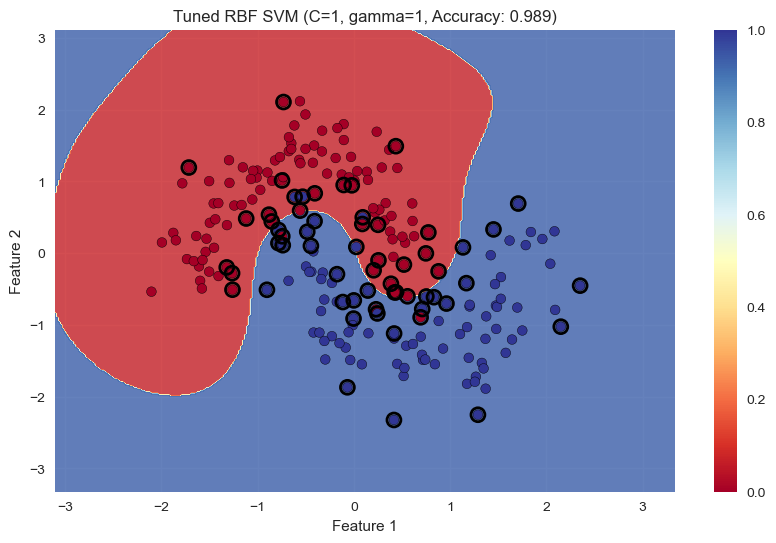

In [13]:
# Visualize the tuned model
plot_decision_boundary(X_train_scaled, y_train_m, best_svm, 
                       f'Tuned RBF SVM (C={best_svm.C}, gamma={best_svm.gamma}, Accuracy: {test_accuracy:.3f})')


## Interpreting the Tuned RBF SVM Decision Boundary

### What This Chart Shows

This visualization demonstrates how a **tuned RBF Support Vector Machine** successfully separates two classes of data that cannot be separated by a straight line.

### Key Visual Elements

**Data Distribution:**
- **Red and blue points** represent two different classes
- **Non-linear pattern**: The classes are intermingled in a complex, curved arrangement
- **No clear linear separation**: You cannot draw a single straight line to separate these groups

**Decision Boundary:**
- **Curved white line**: The SVM's decision boundary that wraps around the data clusters
- **Smooth but complex**: The boundary follows the natural shape of the data distribution
- **Effective separation**: Successfully separates the two classes despite their complex arrangement

**Support Vectors:**
- **Black circles**: Highlight the critical data points closest to the decision boundary
- **Minimal influence**: Only these points determine the final boundary position
- **Efficient model**: The SVM only "remembers" these key points for predictions

### Performance Metrics

**Accuracy: 0.989 (98.9%)**
- **Excellent performance**: Nearly perfect classification on this complex dataset
- **High confidence**: The model is very reliable in its predictions
- **Well-tuned**: The hyperparameters (C=1, gamma=1) are optimally set

### Why This Matters for Machine Learning

**Kernel Trick Success:**
- **Problem solved**: Non-linear data that would fail with linear methods is successfully classified
- **Higher-dimensional mapping**: The RBF kernel implicitly transforms data to find separation
- **Real-world relevance**: Many real datasets have similar non-linear patterns

**Hyperparameter Impact:**
- **C=1**: Balanced approach between margin size and classification accuracy
- **Gamma=1**: Moderate influence radius - not too simple, not too complex
- **Tuning success**: Systematic parameter search found the optimal combination

**Model Quality Indicators:**
- **Good generalization**: Smooth boundary suggests the model learned underlying patterns
- **Robust performance**: High accuracy indicates reliable predictions on new data
- **No overfitting**: The boundary is complex enough to capture patterns but not overly wiggly

### Practical Implications

**When to Use This Approach:**
- **Non-linear data**: When linear methods fail to separate classes effectively
- **Complex patterns**: Data with curved or irregular class boundaries
- **High accuracy needs**: Applications requiring reliable classification performance

**Preprocessing Considerations:**
- **Feature scaling**: Essential for SVM performance (as demonstrated in the code)
- **Parameter tuning**: Critical for achieving optimal results
- **Cross-validation**: Ensures the model generalizes well to unseen data

**Model Selection Insights:**
- **SVM advantages**: Excellent for non-linear classification with proper kernel selection
- **RBF kernel**: Often the best choice for complex, non-linear patterns
- **Tuning importance**: Proper hyperparameter optimization can dramatically improve performance

**Understanding SVM Hyperparameters:**

- **C (Regularization parameter)**: Controls the trade-off between margin maximization and misclassification
  - Low C: Larger margin, more misclassifications allowed
  - High C: Smaller margin, fewer misclassifications allowed

- **Gamma (RBF kernel parameter)**: Controls the "reach" of each training example
  - Low gamma: Far-reaching influence, smoother decision boundary
  - High gamma: Close-reaching influence, more complex decision boundary

- **Kernel**: The function used to transform data into higher dimensions


### Demo 4: Real-World Dataset - Breast Cancer Classification

Let's apply SVMs to a real medical dataset to see how they perform in practice.


In [ ]:
# Load breast cancer dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print(f"Dataset shape: {X_cancer.shape}")
print(f"Features: {cancer.feature_names[:5]}...")
print(f"Target classes: {cancer.target_names}")

# Split and scale the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=42, stratify=y_cancer)

# Scale features (crucial for SVM)
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)        # recall it - why we use .transform() instead of .fit_transform()? 
                                                                     # Check Day04_Data_Preprocessing.ipynb for more details.


# Train SVM with RBF kernel
svm_cancer = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Make predictions
y_pred_cancer = svm_cancer.predict(X_test_cancer_scaled)
accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)

print(f"\nSVM Accuracy on Breast Cancer Dataset: {accuracy_cancer:.3f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test_cancer, y_pred_cancer, target_names=cancer.target_names))


Dataset shape: (569, 30)
Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target classes: ['malignant' 'benign']

SVM Accuracy on Breast Cancer Dataset: 0.977

Detailed Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



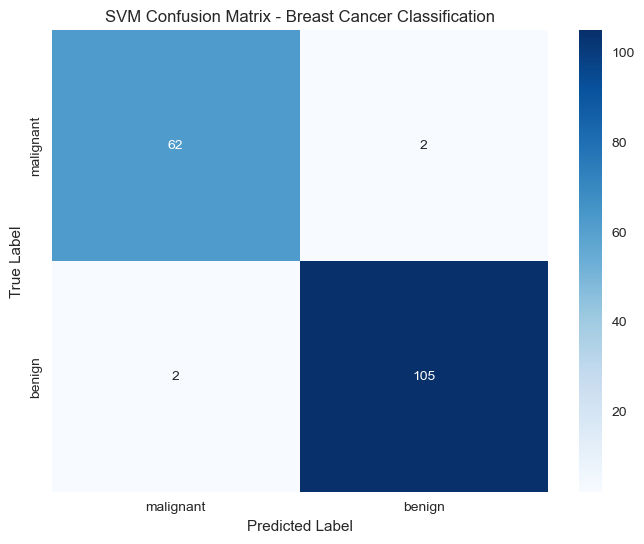

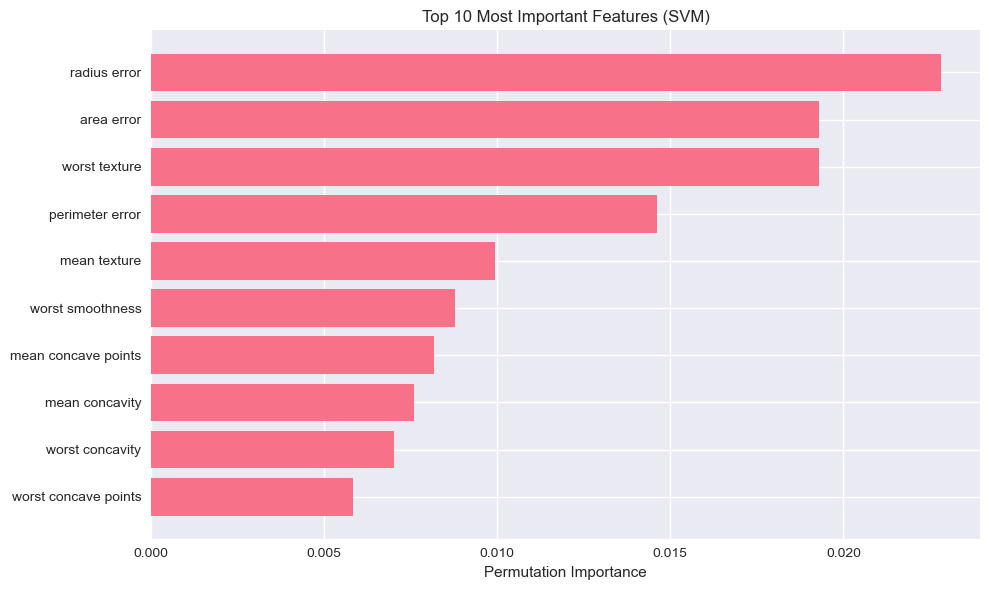

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test_cancer, y_pred_cancer)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.title('SVM Confusion Matrix - Breast Cancer Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance (using permutation importance)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_cancer, X_test_cancer_scaled, y_test_cancer, 
                                        n_repeats=10, random_state=42)

# Get top 10 most important features
feature_importance = perm_importance.importances_mean
top_features_idx = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_idx)), feature_importance[top_features_idx])
plt.yticks(range(len(top_features_idx)), 
           [cancer.feature_names[i] for i in top_features_idx])
plt.xlabel('Permutation Importance')
plt.title('Top 10 Most Important Features (SVM)')
plt.tight_layout()
plt.show()


**Performance Analysis:**
- SVM achieves excellent accuracy on this medical dataset
- The model correctly identifies malignant and benign tumors
- Feature importance shows which characteristics matter most for classification
- This demonstrates SVM's effectiveness on high-dimensional, real-world data


---

## 3. Hands-on Exercise

Now it's your turn! Complete these exercises to solidify your understanding of SVMs.


### Exercise 1: Kernel Comparison Challenge

**Task:** Compare different SVM kernels on a custom dataset and analyze their performance.

**Instructions:**
1. Create a dataset using `make_classification` with `n_features=2` and `n_clusters_per_class=3`
2. Train SVMs with linear, polynomial, and RBF kernels
3. Visualize the decision boundaries for each kernel
4. Compare their accuracies and explain which kernel works best and why

**Starter Code:**


In [10]:
# Your code here
# Hint: Start by creating the dataset
# X, y = make_classification(...)

# Then train different kernels and compare
# kernels = ['linear', 'poly', 'rbf']
# for kernel in kernels:
#     svm = SVC(kernel=kernel)
#     # ... complete the implementation


### Exercise 2: Hyperparameter Tuning Practice

**Task:** Optimize SVM hyperparameters using GridSearchCV on the wine dataset.

**Instructions:**
1. Load the wine dataset from sklearn
2. Split the data and scale features
3. Use GridSearchCV to find optimal C and gamma values for RBF kernel
4. Compare the performance before and after tuning
5. Visualize the results

**Starter Code:**


In [11]:
# Your code here
# from sklearn.datasets import load_wine
# 
# wine = load_wine()
# X_wine = wine.data
# y_wine = wine.target
# 
# # Complete the implementation...


### Exercise 3: SVM vs Other Algorithms

**Task:** Compare SVM performance with other algorithms on the digits dataset.

**Instructions:**
1. Load the digits dataset (handwritten digit recognition)
2. Train SVM, Random Forest, and Logistic Regression
3. Compare their accuracies and training times
4. Analyze which algorithm works best for this specific problem

**Starter Code:**


In [12]:
# Your code here
# from sklearn.datasets import load_digits
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# import time
# 
# # Complete the implementation...


---

## 4. Takeaways & Next Steps

### Key Takeaways

**What You've Learned:**
1. **SVM Intuition**: SVMs find the optimal decision boundary by maximizing the margin between classes
2. **Kernel Trick**: Allows SVMs to handle non-linear patterns by working in higher-dimensional spaces
3. **Kernel Types**: Different kernels (linear, polynomial, RBF, sigmoid) work best for different data patterns
4. **Hyperparameter Tuning**: C and gamma parameters significantly affect SVM performance
5. **Real-World Applications**: SVMs excel at high-dimensional problems like medical diagnosis and image classification

**When to Use SVMs:**
- High-dimensional data (many features)
- Non-linearly separable patterns
- Need for robust, generalizable models
- Moderate dataset sizes
- Binary and multi-class classification

**SVM Limitations:**
- Slow training on very large datasets
- Memory intensive for large datasets
- No probabilistic outputs (by default)
- Sensitive to feature scaling
- Black box nature (less interpretable than trees)


### Next Steps in Your ML Journey

**Tomorrow (Day 9):** We'll cover k-Nearest Neighbors (kNN) and Naive Bayes - two more essential algorithms that are often asked about in interviews.

**Further Learning Resources:**

**Books:**
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- "Pattern Recognition and Machine Learning" by Christopher Bishop

**Online Courses:**
- Coursera: Machine Learning by Andrew Ng
- edX: MIT Introduction to Machine Learning

**Practice Datasets:**
- Kaggle: SVM competitions and datasets
- UCI Machine Learning Repository
- Scikit-learn built-in datasets

**Advanced Topics to Explore:**
- Support Vector Regression (SVR)
- One-class SVM for anomaly detection
- Custom kernel functions
- SVM with different loss functions

### Practice Recommendations

1. **Implement SVMs from scratch** (optional but educational)
2. **Try SVMs on your own datasets** from Kaggle or other sources
3. **Compare SVMs with other algorithms** on the same problems
4. **Experiment with different kernels** and understand their mathematical properties
5. **Practice hyperparameter tuning** using different search strategies

---

**Congratulations!** You've mastered Support Vector Machines and the kernel trick. You now understand one of the most elegant algorithms in machine learning. Tomorrow we'll continue with kNN and Naive Bayes to complete your foundation in classical ML algorithms.

**Remember:** The key to mastering ML is consistent practice. Try implementing SVMs on different datasets and always ask yourself: "Why does this kernel work better for this data?" This analytical thinking will make you a better data scientist.


## 📫 Let's Connect
- 💼 **LinkedIn:** [hashirahmed07](https://www.linkedin.com/in/hashirahmed07/)
- 📧 **Email:** [Hashirahmad330@gmail.com](mailto:Hashirahmad330@gmail.com)
- 🐙 **GitHub:** [CodeByHashir](https://github.com/CodeByHashir)
